### Analysing live data using CURE
Below applies CURE clustering to static data, producing a table with the desired number of clusters and representative points. These representative points are used to classify new live data, which is fed in from a separate q process running the script `load.q`.

### Dependencies
To run the below notebook, the following dependencies are required.
```
- embedPy
- matplotlib
```

In [1]:
\l ml/ml.q
.ml.loadfile`:clust/init.q
plt:.p.import`matplotlib.pyplot

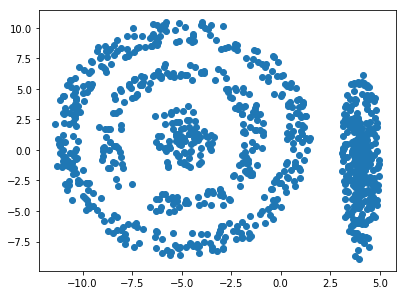

In [2]:
\S 42
dp:1000
dsc:{(y+x?z-y)*/:(cos;sin)@\:4*x?acos 0}
d :flip(-5 1)+(1 1.5)*dsc[1000;0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
d,:flip(4 -1)+(1 8)*dsc[4000;0;1.]
d@:neg[dp&count d]?count d
plt[`:scatter][;]. flip d;
plt[`:show][];

reps| (-5.065531 -8.61318;-3.959216 10.47407;-10.99299 1.256953;1.457815 0.78..
tree| (-1 0 1 2 3 4 4 3 7 7 2 10 11 11 10 14 14 1 17 18 19 19 18 22 22 17 25 ..
r2c | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1..
r2l | 8 31 20 51 27 5 36 59 28 20 13 5 8 37 58 30 31 28 8 5 27 31 59 20 6 5 3..
pts                  clt
------------------------
-5.065531  -8.61318  0  
-3.959216  10.47407  0  
-10.99299  1.256953  0  
1.457815   0.7897332 0  
-9.576597  7.254873  0  
-9.691412  -4.726125 0  
-0.6490167 -4.795206 0  
-0.6262288 5.998299  0  
-7.467534  9.990034  0  
-10.99405  4.407834  0  
-9.978951  -1.626368 0  
-7.804486  -7.315733 0  
-2.272979  -7.318183 0  
0.9546897  -2.276457 0  
1.136971   3.784321  0  
-2.216576  8.188493  0  
-5.299032  8.848112  0  
-7.632501  7.852184  0  
-4.464303  -6.823599 0  
-10.79697  -3.26695  0  
..


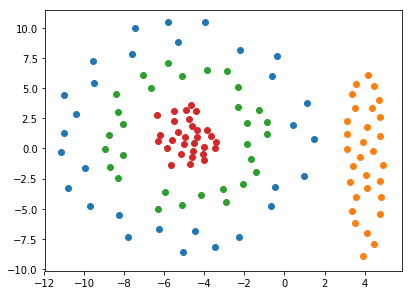

In [3]:
/.clust.cure[data;n clust;dist;n reps;comp;C code?;streaming?]
show t:.ml.clust.cure[d;4;30;`df`c`b`s!(`edist;0;1;1)]
show reps:([]pts:t`reps;clt:t`r2c)
{plt[`:scatter][;]. flip x}each exec pts by clt from reps;
plt[`:show][];

In [4]:
/run `q load.q` as new process
\p 5002
show newpts:([]pts:();clt:())
classify:{[t;df;x]`newpts upsert x,'.ml.clust.clustnew[t;df]each x:enlist each x}[t;`e2dist];

pts clt
-------


In [7]:
/new data fed in and classified every 5s
count newpts

348


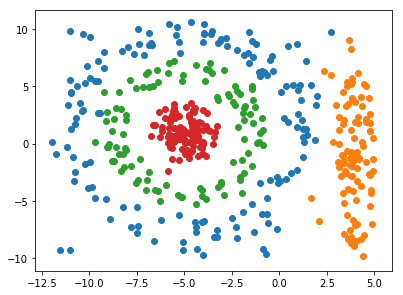

In [8]:
/plot old reps and new pts in clusters
{plt[`:scatter][;]. flip x}each{@[x;key y;,;value y]}.{exec pts by clt from x}each(reps;newpts);
plt[`:show][];

In [9]:
.z.ts:{np:newpts,reps;
 nrep:{.ml.clust.i.curerep[x;`e2dist;y;30;0]}[np`pts]each exec i by clt from np;
 tree:.ml.clust.kd.buildtree[flip d;r:ceiling count[d:raze nrep]%100];
 r2c:raze(count each nrep)#'key nrep;
 r2l:{{not x y}[x 2].ml.clust.i.findl[y;x]/0}[tree]each d;
 t::`reps`tree`r2c`r2l!(d;tree;r2c;r2l);
 reps::([]pts:d;clt:r2c);
 newpts::0#newpts;}

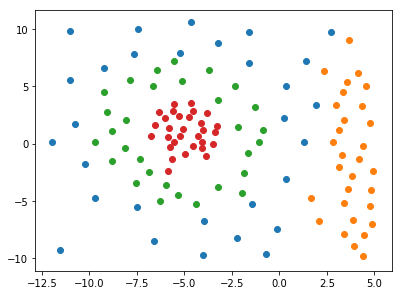

In [10]:
/recalculate rep pts
.z.ts[]
{plt[`:scatter][;]. flip x}each exec pts by clt from reps;
plt[`:show][];

----